# Breast Cancer Prediction Agorithm

Table of Contents:

1.Business Problem
2.Importing the Dataset
3.Exploratory Data Analysis (EDA)
3.1 Data Overview
3.2 Data Cleaning/ Data wrangling (Deleting Duplicate Lines, Dropping irrelevant columns etc.)
4.Data Visualization
5.Model Preparation
5.1 Splitting the dataset into Train and Test Sets
6.Machine Learning Models 
6.1 Decision Tree
6.2 Random Forest
6.3 KNN
7.Summary


1. Business Problem
Finding breast cancer early and getting state-of-the-art cancer treatment are two of the most important strategies for preventing deaths from breast cancer. Breast cancer that’s found early, when it’s small and has not spread, is easier to treat successfully. In this work we will apply a breast cancer classification with KNN algorithm, DT Algorithm and Random Forest Algorithm.

Dataset Information:
The dataset contains 569 rows and 32 columns of tumor shape and specifications. The tumor is classified as benign or malignant based on its geometry and shape. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which is type of biopsy procedure. They describe characteristics of the cell nuclei present in the image.

The features of the dataset include:

1.tumor radius (mean of distances from center to points on the perimeter)
2.texture (standard deviation of gray-scale values)
3.perimeter
4.area
5.smoothness (local variation in radius lengths)
6.compactness (perimeter² / area — 1.0)
7.concavity (severity of concave portions of the contour)
8.concave points (number of concave portions of the contour)
9.symmetry
10.fractal dimension

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

2.Importing the dataset

In [4]:
#Data Collection
data = pd.read_csv("dataset.csv")

In [5]:
# loading the data to a data frame
data.shape

(569, 32)

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


3.Exploratory Data Analysis (EDA)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [8]:
#Identifying object features
data.describe(include="O")

,diagnosis
count,569
unique,2
top,B
freq,357


In [9]:
#Finding unique values in categorical data
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [10]:
# Dropping id column as it is of no use
data = data.drop('id', axis = 1)

In [11]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [12]:
#Separating benign and malignant patients.
benign     = data[data["diagnosis"] == "B"]
malignant = data[data["diagnosis"] == "M"]

#Assigning numercial values to catagorical target column.
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})


In [13]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [14]:
# Deleting Duplicate Lines and keeping last record
data = data.drop_duplicates(keep='last')
#Checking number of rows
data.shape[0]

569

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

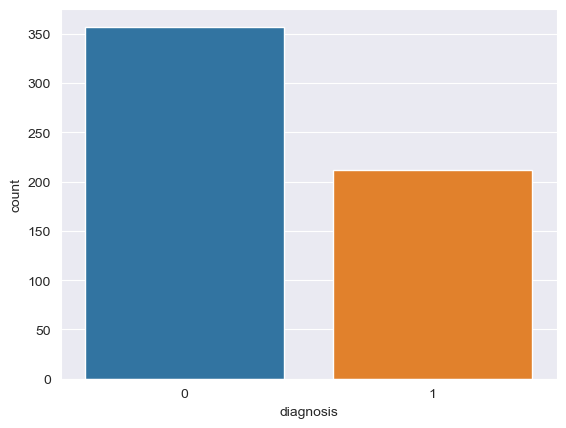

In [16]:
sns.countplot(x='diagnosis', data=data)

In [17]:
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

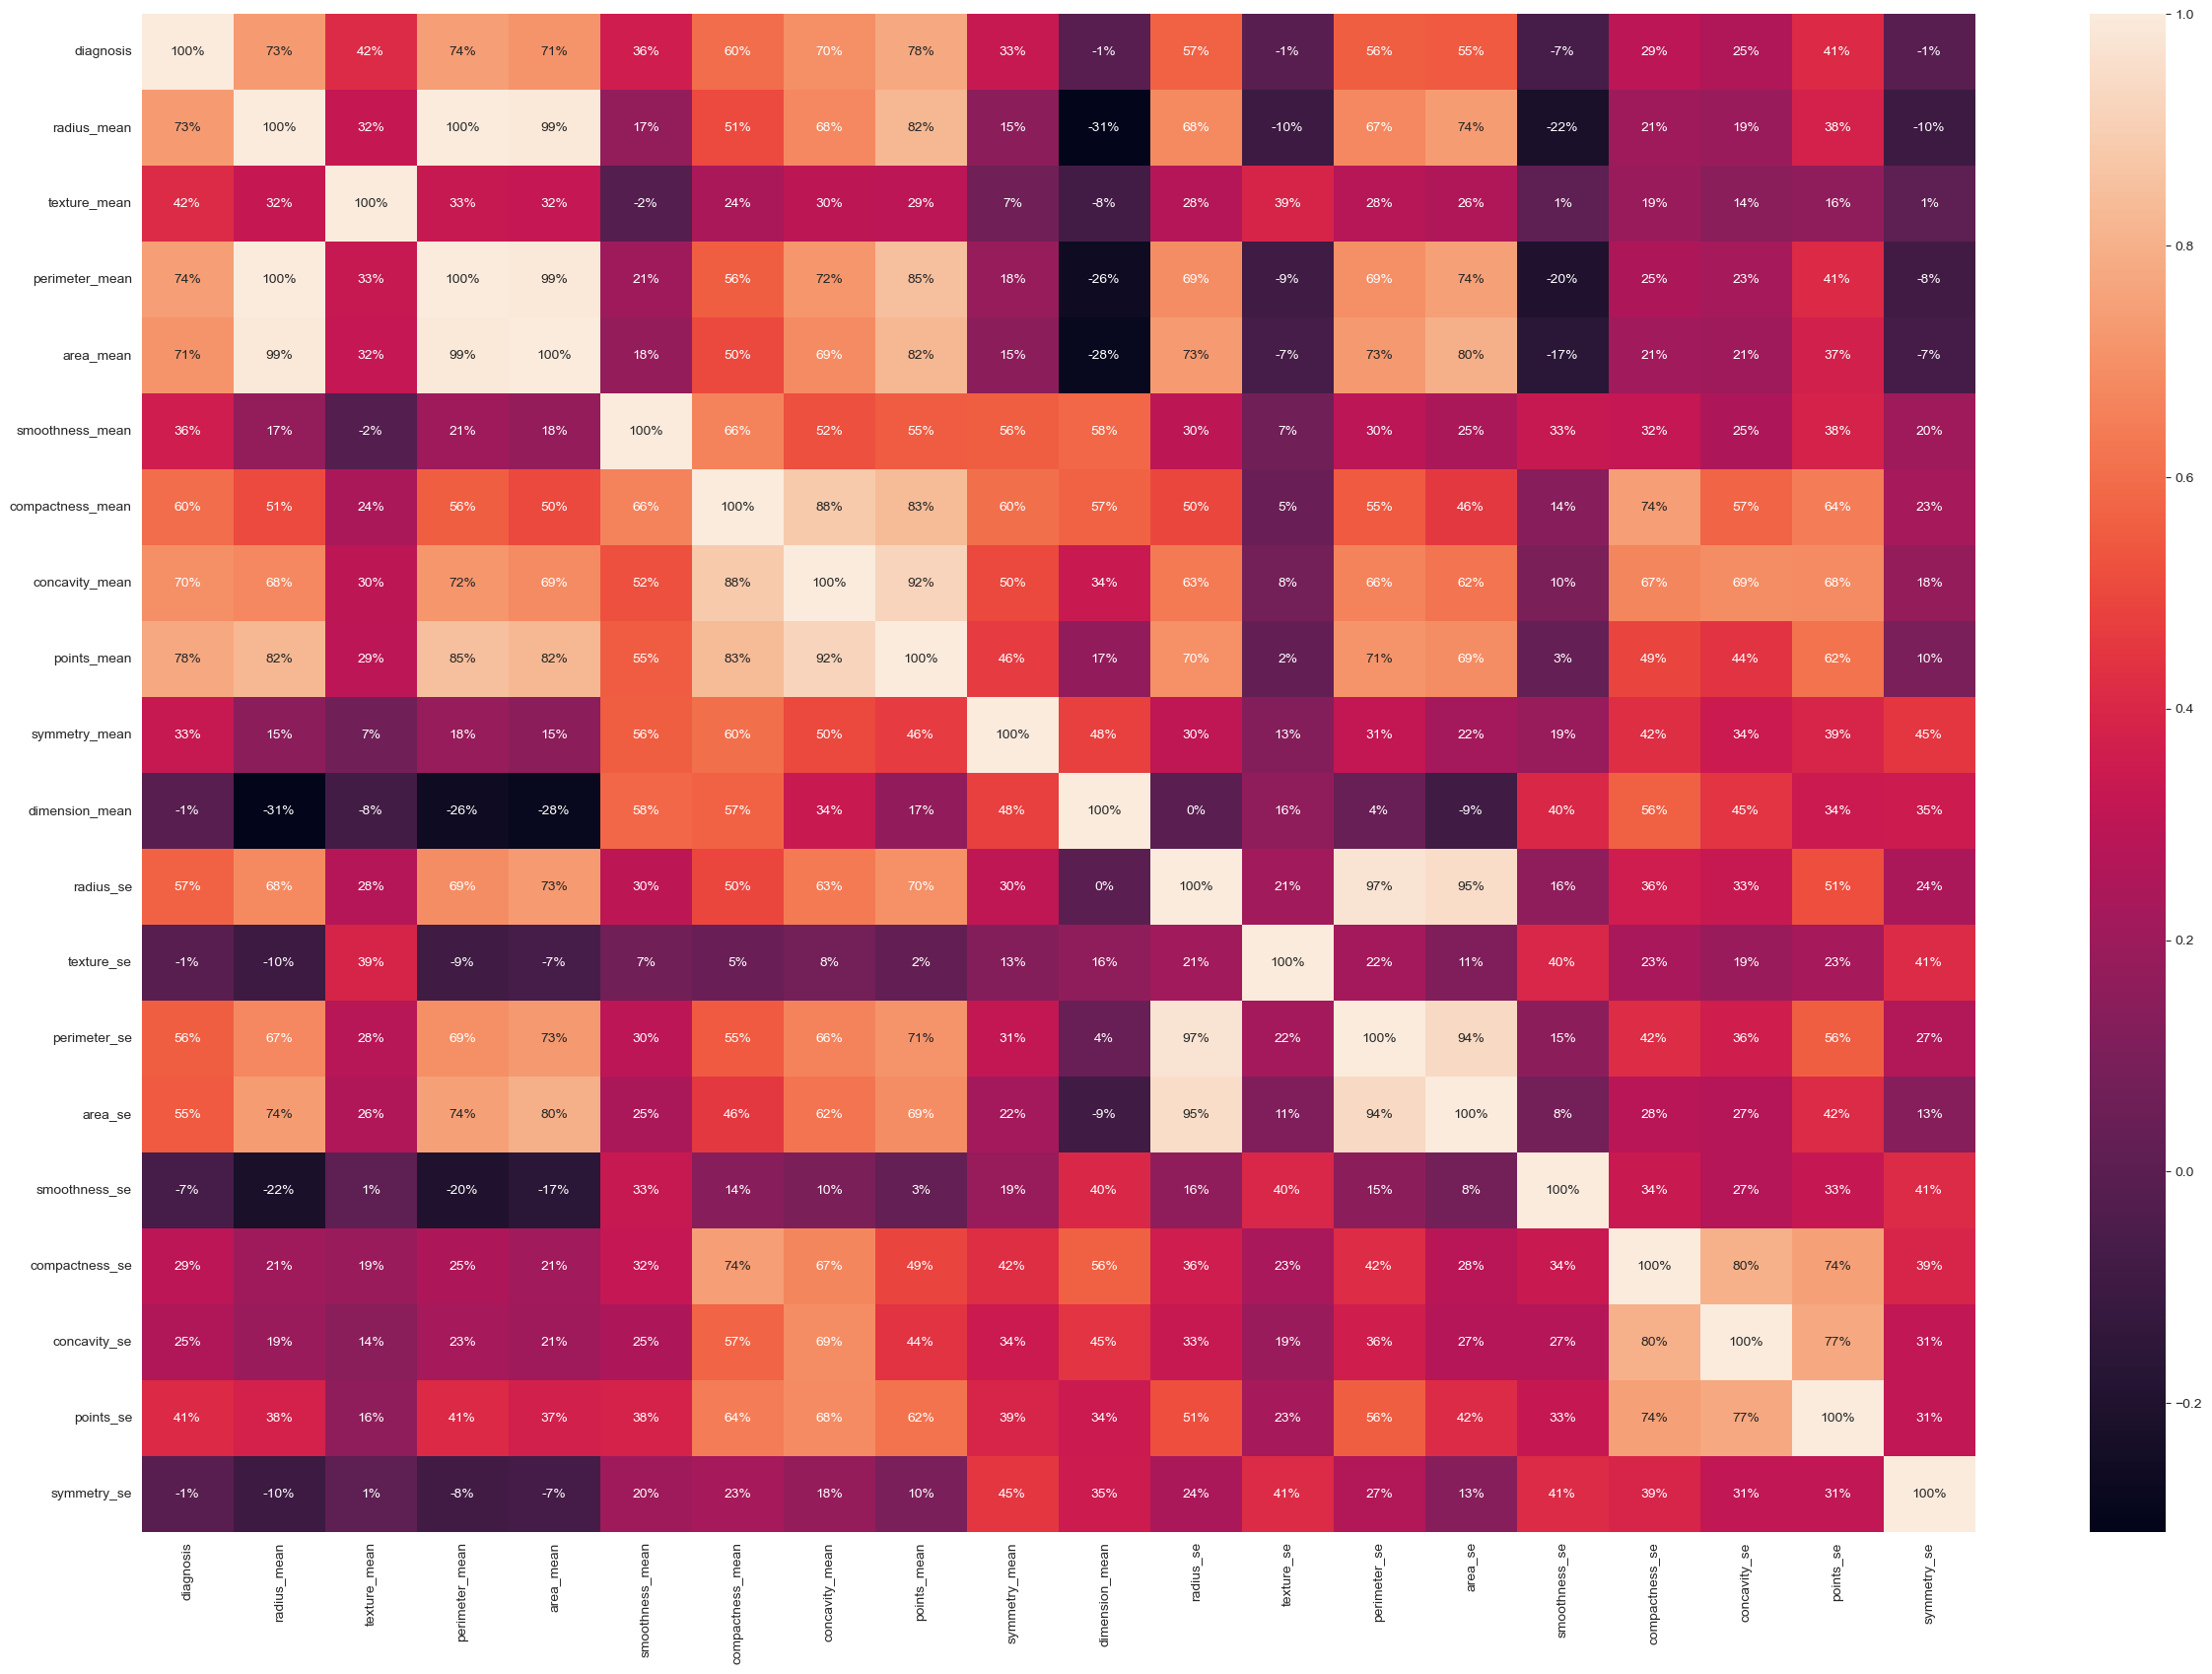

In [18]:
#Visualizing corrrealtion 
plt.subplots(figsize=(30,20))

sns.heatmap(data.iloc[:,0:20].corr(),annot=True,fmt=".0%")  #fmt gives us percentage 

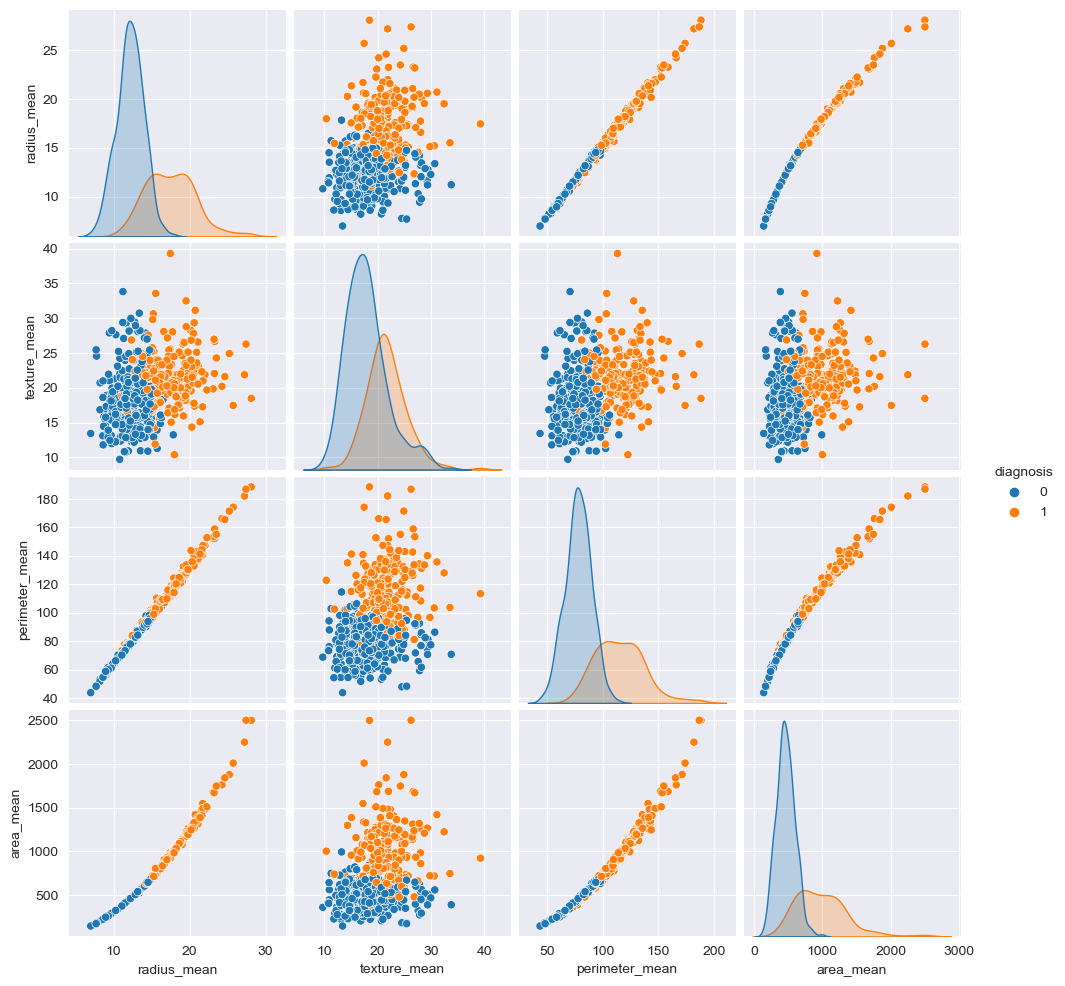

In [19]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(data[cols], hue="diagnosis")
plt.show()

In [20]:
y = data['diagnosis']
x = data.drop(['diagnosis'], axis = 1)

In [21]:
#Splitting dataset for training the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
#Importing machine learning models for analysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [23]:
dt = DecisionTreeClassifier( random_state = 42)
dt.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_dt = dt.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Decision Tree model is :",metrics.accuracy_score(y_test, y_pred_dt))

Accuracy of the Decision Tree model is : 0.9239766081871345


In [24]:
rfc = RandomForestClassifier( n_estimators = 150, random_state = 42)
rfc.fit(x_train, y_train)
#Predict the response for test dataset
y_pred_rfc = rfc.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the Random Forest is :",metrics.accuracy_score(y_test, y_pred_rfc))

Accuracy of the Random Forest is : 0.9707602339181286


In [27]:
from sklearn import metrics
arr = [2,6,12,24]
def mode(a, axis=0, nan_policy='propagate', keepdims=False ):
    mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
for i in arr:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    #Predict the response for test dataset
    y_pred5 = knn2.predict(x_test)
    print("Accuracy of KNN model with", i," neighbors is:",metrics.accuracy_score(y_test, y_pred5))

Accuracy of KNN model with 2  neighbors is: 0.9824561403508771
Accuracy of KNN model with 6  neighbors is: 0.9766081871345029
Accuracy of KNN model with 12  neighbors is: 0.9766081871345029
Accuracy of KNN model with 24  neighbors is: 0.9649122807017544


C:\Users\bavig\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bavig\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Summary

In [32]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE"]
df_pred = {"NAME OF MODEL" : ["DECISION TREE", "RANDOM FOREST", "KNN"],
           "ACCURACY SCORE " : [metrics.accuracy_score(y_test, y_pred_dt), metrics.accuracy_score(y_test, y_pred_rfc),metrics.accuracy_score(y_test, y_pred5)]}
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,DECISION TREE,0.923977
1,RANDOM FOREST,0.970760
2,KNN,0.964912
